In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('monet.csv')
dataframe.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [4]:
dataframe.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [7]:
dataframe.shape

(430, 6)

In [141]:
dataframe['AREA'] = dataframe['HEIGHT']*dataframe['WIDTH']


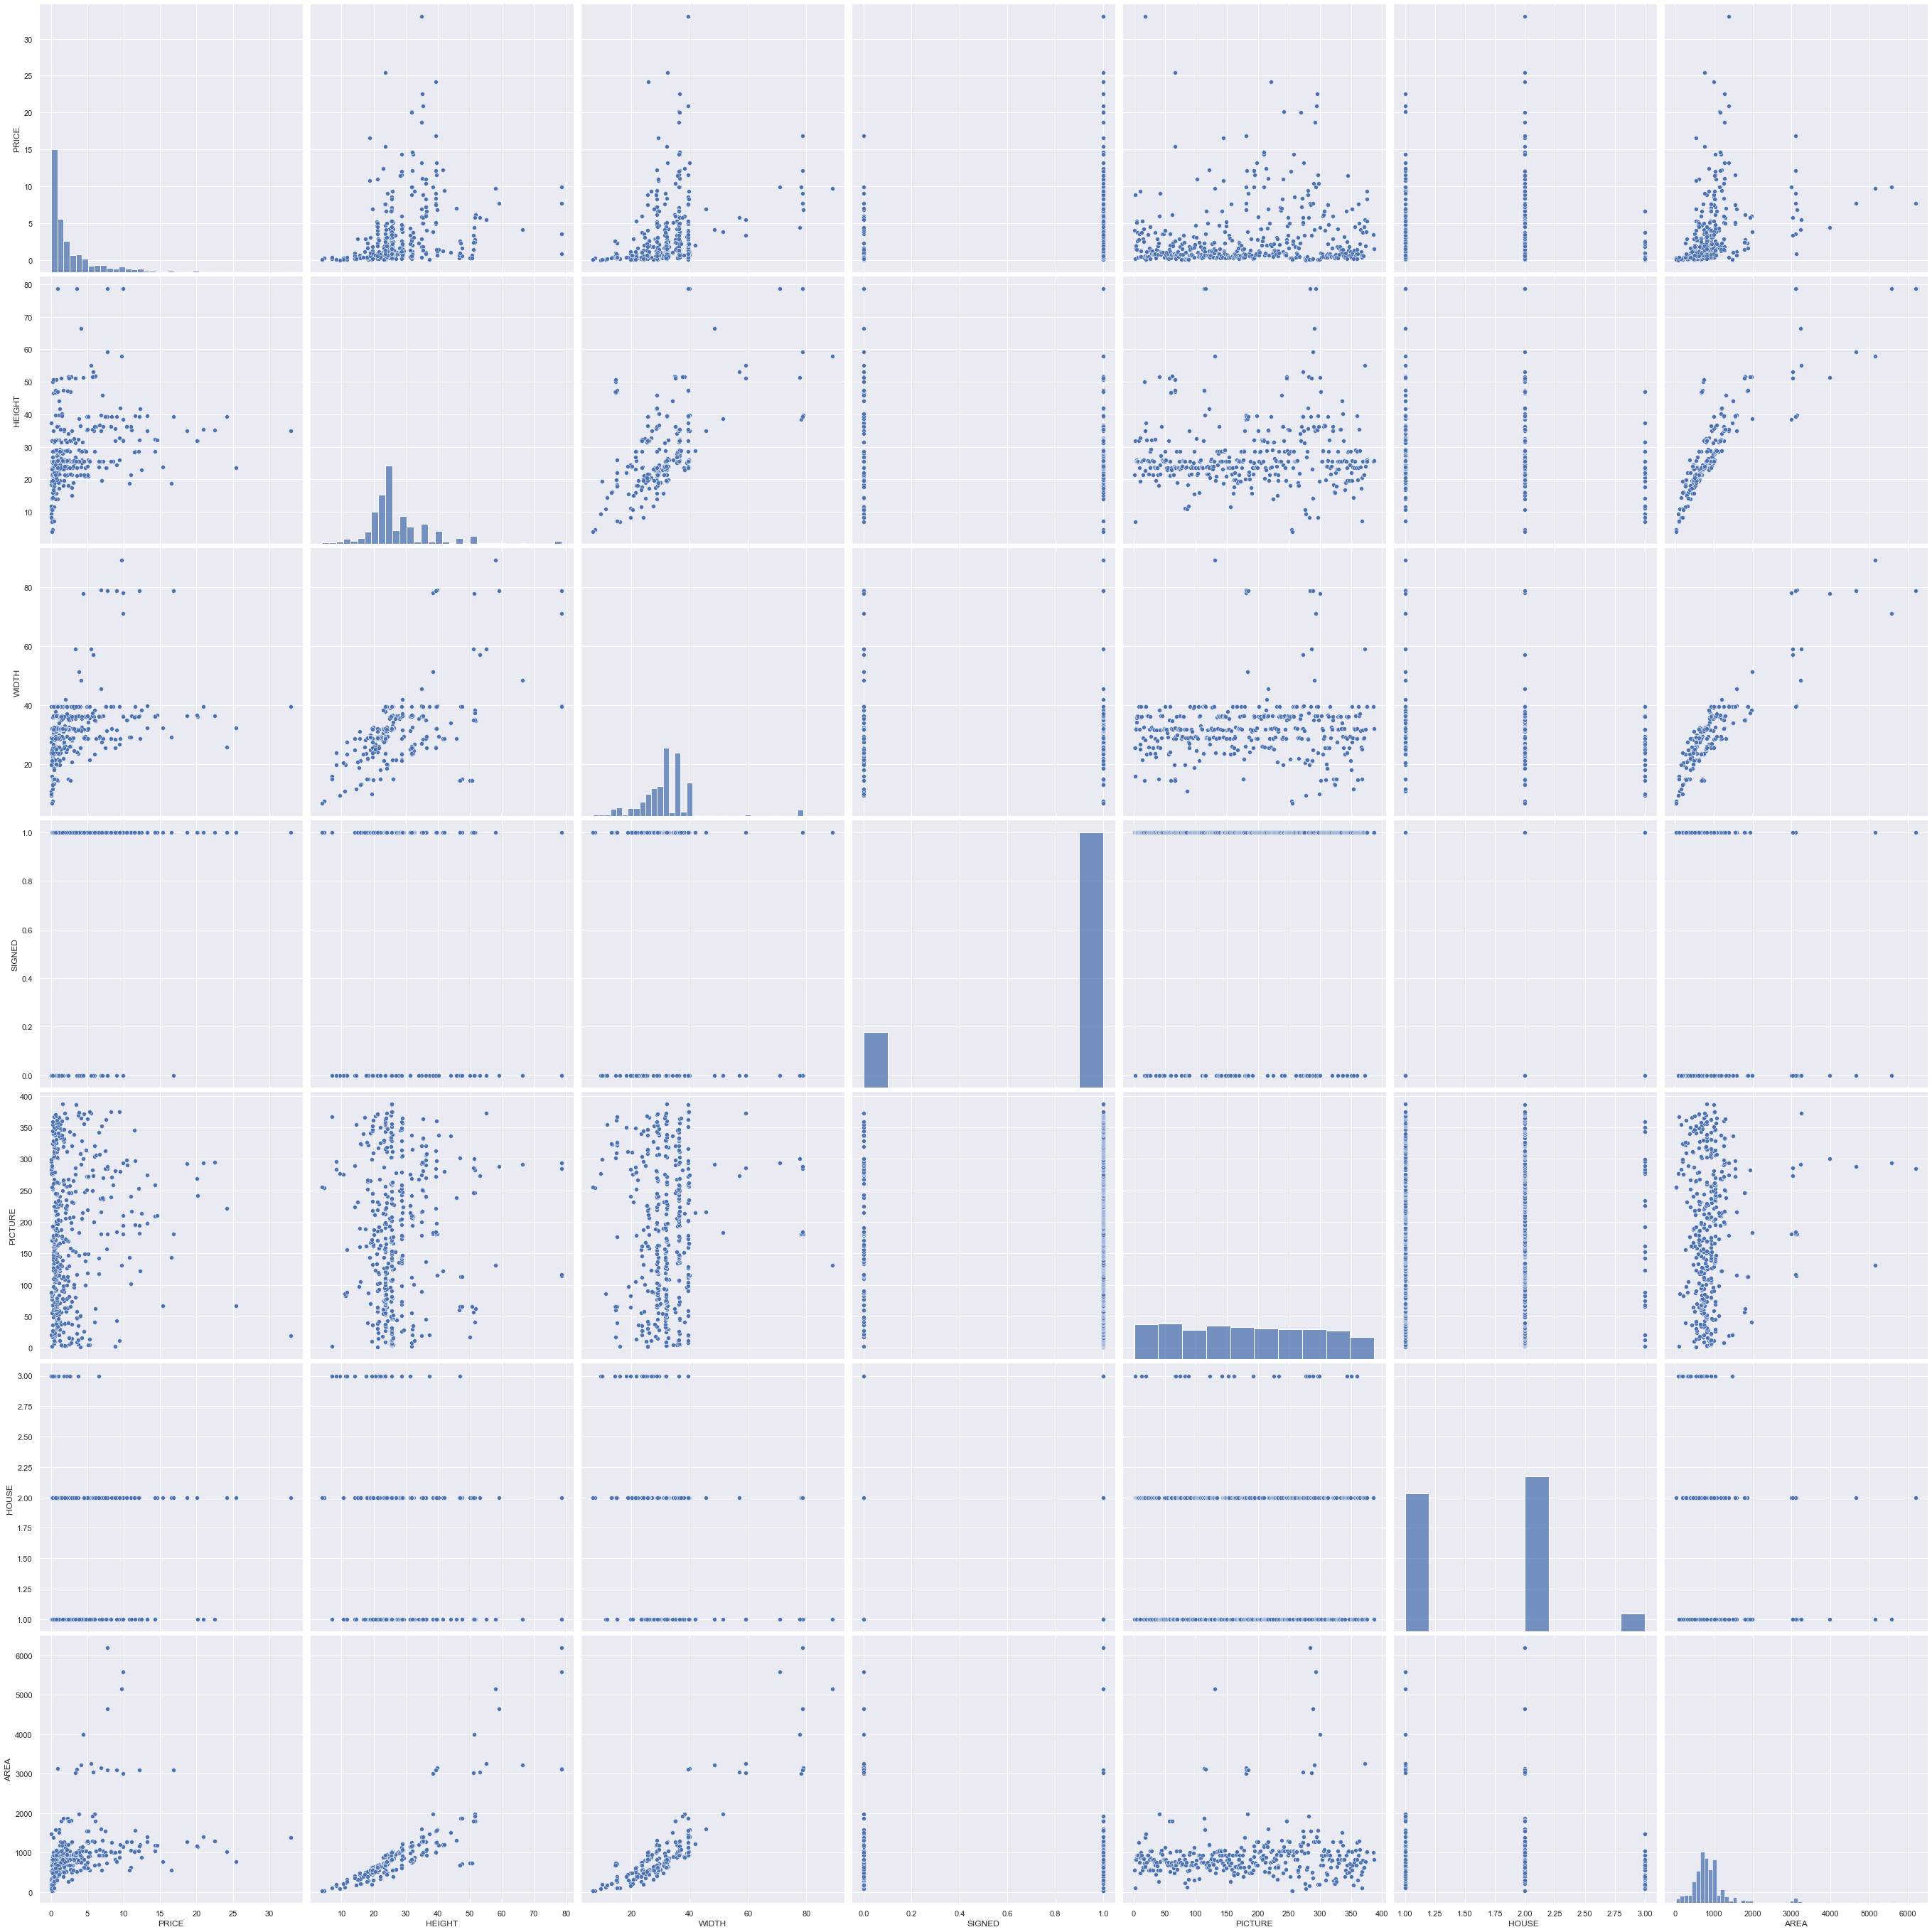

In [157]:
sns.pairplot(dataframe, height=5.5,)
plt.show()

In [144]:
dataframe.drop('SIZE', axis=1, inplace=True)

In [145]:
dataframe.corr()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
PRICE,1.000000,0.314581,0.346881,0.136362,0.106078,-0.039878,0.347227
HEIGHT,0.314581,1.000000,0.503280,-0.145835,0.041556,-0.095278,0.810881
WIDTH,0.346881,0.503280,1.000000,-0.109218,0.046845,-0.169441,0.853942
SIGNED,0.136362,-0.145835,-0.109218,1.000000,0.009664,-0.132464,-0.198969
PICTURE,0.106078,0.041556,0.046845,0.009664,1.000000,-0.008359,0.090118
HOUSE,-0.039878,-0.095278,-0.169441,-0.132464,-0.008359,1.000000,-0.124385
AREA,0.347227,0.810881,0.853942,-0.198969,0.090118,-0.124385,1.000000


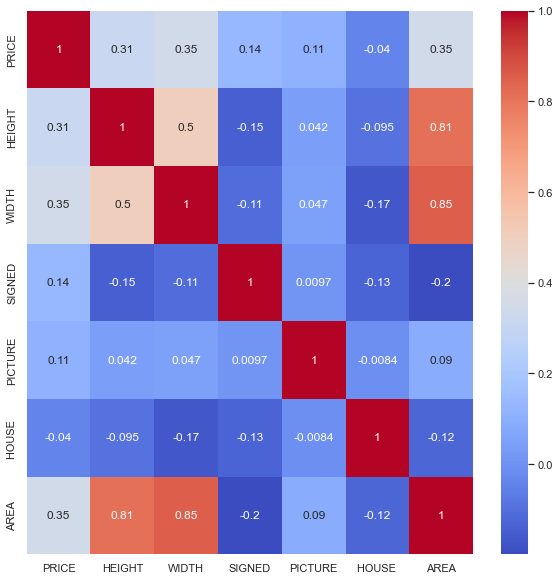

In [146]:
plt.figure(figsize =(10,10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')
plt.show()

In [160]:
# Creating X and y
X = dataframe['AREA']
y = dataframe['PRICE']

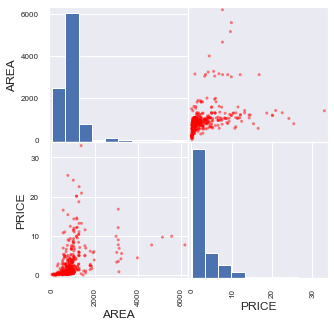

In [161]:
dataframe2= dataframe[['AREA','PRICE']]
scatter_matrix (dataframe2, alpha=0.5, figsize=(5,5), color='red')
plt.show()
array= dataframe2.values
X = array [:, 0:1]
Y = array [:,1]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [163]:
X_train
y_train

252     0.885007
272     3.025000
117     0.343500
201     0.387500
15      9.350000
         ...    
343    20.906000
359     0.671000
323     0.070226
280     7.046000
8       1.375000
Name: PRICE, Length: 301, dtype: float64

In [164]:
# importing statsmodels.api library 
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [165]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [167]:
lr.params

const    0.666999
x1       0.002418
dtype: float64

In [168]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     37.23
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.25e-09
Time:                        20:42:41   Log-Likelihood:                -853.90
No. Observations:                 301   AIC:                             1712.
Df Residuals:                     299   BIC:                             1719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6670      0.432      1.544      0.124      -0.183       1.517
x1             0.0024      0.000      6.101      0.000       0.002       0.003
==============================================================================
Omnibus:                      244.188   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3282.026
Skew:                           3.372   Prob(JB):                         0.00
Kurtosis:                      17.704   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

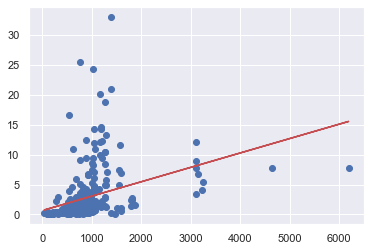

In [169]:


plt.scatter(X_train, y_train)

plt.plot(X_train, 0.6670 + 0.0024*X_train, 'r')
plt.show()

In [172]:
y_train_pred = lr.predict(X_train_sm)


In [173]:
# Creating a residuals from the y_train data and predicted y_data to get the curve
residual = (y_train - y_train_pred)

C:\Users\LaptopCheckout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


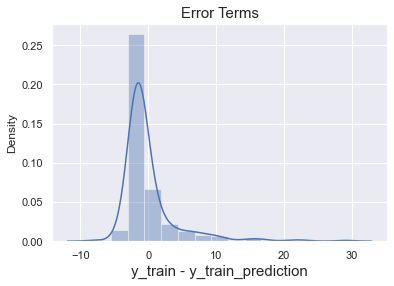

In [174]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_prediction', fontsize = 15)
plt.show()

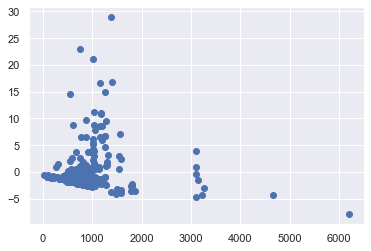

In [175]:
plt.scatter(X_train,res)
plt.show()

In [176]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the  predicted values
y_test_pred

array([ 2.51259773,  2.48768793,  2.65276977,  2.43245105,  2.91439523,
        3.20409862,  2.91574955,  2.17317147,  2.35070821,  2.45155662,
        2.90820405,  1.81043157,  5.46525553,  2.16269968,  7.91995916,
        2.32055042,  2.598597  ,  2.11764438,  2.35602875,  1.5186725 ,
        3.17959996,  3.73114647,  2.03435374,  1.98303472,  1.48604792,
        3.11720453,  2.51854706,  2.35602875,  2.14540792,  3.06801372,
        3.11585021,  2.51661232,  2.90561634,  2.91574955,  3.73114647,
        2.96140945,  2.70870799,  2.17609776,  2.56304612,  3.10632161,
        3.11384292,  7.98496649,  2.90820405,  2.51051788,  1.99955257,
        2.58674671,  0.73019268,  2.3805516 ,  4.0358683 ,  3.19348173,
        2.82375257, 10.31928082,  2.96208661,  4.42126886,  2.43438579,
        2.94805973,  1.20060096,  2.67284271,  3.18654084,  2.01370037,
        3.19710937,  2.49133975,  2.66989223,  1.8326811 ,  1.31271924,
        2.43438579,  3.17959996,  3.59549689,  2.32918421,  2.64

In [177]:
# Importing r2_square library
from sklearn.metrics import r2_score

# to obtain the r square value 
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.11764443979323813

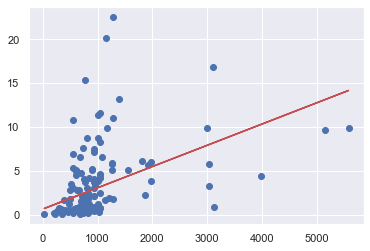

In [178]:
# Visualizing the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [201]:
# Assigning x and y 
X = dataframe['WIDTH']
y = dataframe['PRICE']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [203]:
X_train
y_train

252     0.885007
272     3.025000
117     0.343500
201     0.387500
15      9.350000
         ...    
343    20.906000
359     0.671000
323     0.070226
280     7.046000
8       1.375000
Name: PRICE, Length: 301, dtype: float64

In [204]:
#importing the library 
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)

C:\Users\LaptopCheckout\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [205]:
# Fitting the resgression line using 'OLS method'
lr = sm.OLS(y_train, X_train_sm).fit()

In [206]:
lr.params

const   -1.683242
WIDTH    0.143169
dtype: float64

In [207]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     33.18
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.09e-08
Time:                        20:49:07   Log-Likelihood:                -855.73
No. Observations:                 301   AIC:                             1715.
Df Residuals:                     299   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6832      0.825     -2.040      0.042      -3.307      -0.060
WIDTH          0.1432      0.025      5.760      0.000       0.094       0.192
==============================================================================
Omnibus:                      244.829   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3248.746
Skew:                           3.393   Prob(JB):                         0.00
Kurtosis:                      17.594   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

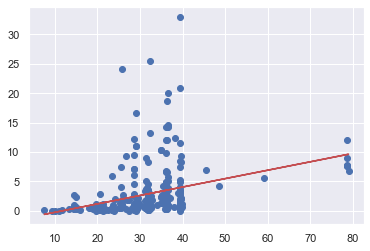

In [208]:


plt.scatter(X_train, y_train)

plt.plot(X_train, -1.6832 + 0.1432*X_train, 'r')
plt.show()

In [226]:
y_train_prediction = lr.predict(X_train_sm)

In [227]:

residual = (y_train - y_train_prediction)

C:\Users\LaptopCheckout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


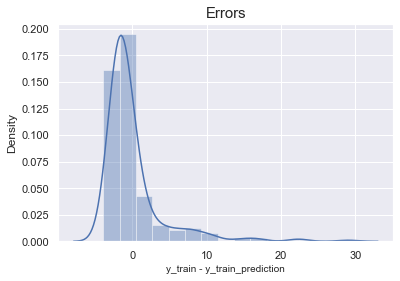

In [229]:
fig = plt.figure()
sns.distplot(residual, bins = 15)
plt.title('Errors', fontsize = 15)
plt.xlabel('y_train - y_train_prediction', fontsize = 10)
plt.show()

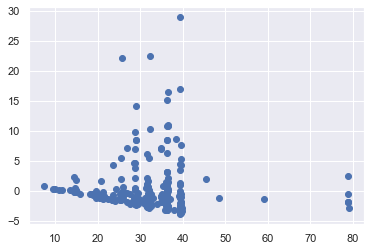

In [212]:
plt.scatter(X_train,res)
plt.show()

In [228]:

X_test_sm = sm.add_constant(X_test)


y_test_prediction = lr.predict(X_test_sm)

# Printing the  predicted values
y_test_prediction

C:\Users\LaptopCheckout\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


84     2.926795
133    1.695543
305    2.926795
23     0.407023
278    3.513788
         ...   
362    3.556738
90     2.883845
6      3.413569
233    3.528105
372    0.464291
Length: 129, dtype: float64

In [214]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_prediction)
r_squared

0.1478489845933061

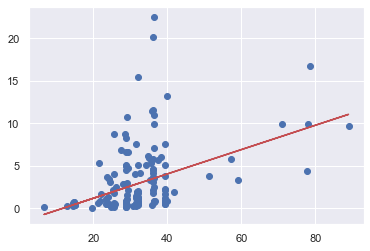

In [215]:
# Visualizing the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_prediction, 'r')
plt.show()

In [221]:
column = ['PRICE','HEIGHT','WIDTH','SIGNED','AREA','HOUSE','PICTURE']

In [222]:
#Normalization of data set
p = preprocessing.normalize(dataframe)
scaled_data = pd.DataFrame(p , columns=column  )
scaled_data.head()

,PRICE,HEIGHT,WIDTH,SIGNED,AREA,HOUSE,PICTURE
0,0.007310,0.038989,0.046860,0.001830,0.001830,0.001830,0.998108
1,0.010762,0.039011,0.031307,0.001223,0.002446,0.002446,0.998684
2,0.001185,0.062077,0.143048,0.000000,0.026990,0.026990,0.987029
3,0.002474,0.031211,0.038861,0.001214,0.004858,0.002429,0.998739
4,0.001806,0.031211,0.038861,0.001214,0.004858,0.002429,0.998740


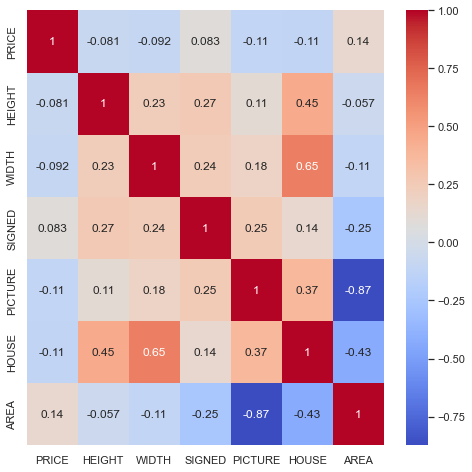

In [149]:
plt.figure(figsize =(8,8))
sns.heatmap(scaled_data.corr(), annot=True, cmap="coolwarm")
plt.show()

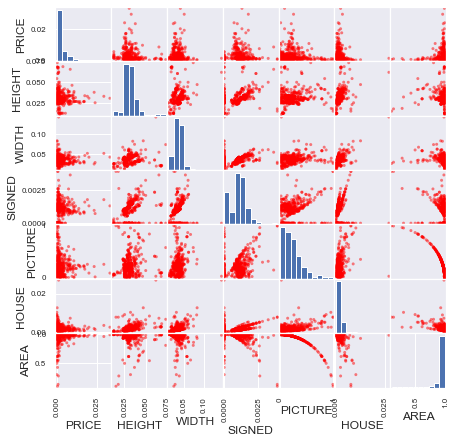

In [152]:
dataframe1=scaled_data [['PRICE','HEIGHT','WIDTH','SIGNED','PICTURE','HOUSE','AREA']]
scatter_matrix (dataframe1, alpha=0.5, figsize=(7,7), color='red')
plt.show()
array= dataframe1.values
X = array [:, 0:4]
Y = array [:,4]

In [153]:
test_size = 0.20
seed = 5
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)
model=LinearRegression()
model.fit(X_train, Y_train)
print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 0.06772290256971406
Coefficients: [-5.75251316  1.49972485  2.59770338 31.33696137]


In [154]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.08246772048178075
